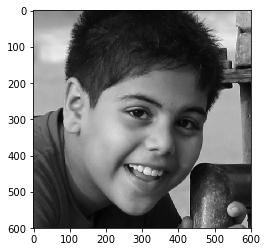

(600, 600)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "Datasets"
CATEGORIES = ["Real","Fake"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break    
img_array.shape    

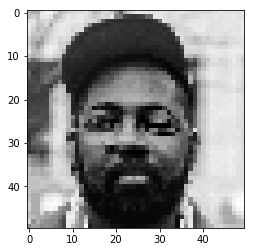

(50, 50)

In [43]:
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()
new_array.shape

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


In [52]:
print(len(training_data))


16


[[array([[138, 139, 137, ..., 174, 165, 199],
         [145, 146, 146, ..., 175, 167, 177],
         [150, 151, 152, ..., 161, 168, 174],
         ...,
         [ 61,  50,  57, ...,  43,  52,  21],
         [ 61,  50,  39, ...,  46, 175,  32],
         [ 58,  49,  39, ..., 124, 150,  31]], dtype=uint8), 0],
 [array([[163, 158, 157, ..., 144, 143, 149],
         [167, 163, 155, ..., 146, 144, 141],
         [163, 157, 156, ..., 146, 153, 146],
         ...,
         [175, 143, 156, ...,  88, 118, 108],
         [150, 154, 165, ...,  86,  92, 158],
         [141, 171, 160, ..., 147, 169, 165]], dtype=uint8), 0],
 [array([[178, 172, 175, ...,  59,  59,  81],
         [178, 174, 170, ...,  93, 149, 134],
         [176, 175,  25, ...,  57,  95,  61],
         ...,
         [ 11,   9,  11, ...,  13,  15,  23],
         [ 11,   7,  10, ...,  21,  22,  18],
         [ 12,  11,   9, ...,  13,  21,  20]], dtype=uint8), 0],
 [array([[72, 74, 73, ..., 74, 71, 68],
         [71, 74, 75, ..., 78, 78

In [7]:
#import random

#random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
1
1


In [92]:
X = []
y = []

In [85]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
print(X.shape)
X

(16, 50, 50, 1)


array([[[[138],
         [139],
         [137],
         ...,
         [174],
         [165],
         [199]],

        [[145],
         [146],
         [146],
         ...,
         [175],
         [167],
         [177]],

        [[150],
         [151],
         [152],
         ...,
         [161],
         [168],
         [174]],

        ...,

        [[ 61],
         [ 50],
         [ 57],
         ...,
         [ 43],
         [ 52],
         [ 21]],

        [[ 61],
         [ 50],
         [ 39],
         ...,
         [ 46],
         [175],
         [ 32]],

        [[ 58],
         [ 49],
         [ 39],
         ...,
         [124],
         [150],
         [ 31]]],


       [[[163],
         [158],
         [157],
         ...,
         [144],
         [143],
         [149]],

        [[167],
         [163],
         [155],
         ...,
         [146],
         [144],
         [141]],

        [[163],
         [157],
         [156],
         ...,
         [146],
         [

In [110]:
x = []
y = []
for train in training_data:
    x.append(train[0])
    y.append(train[1])
print(len(x))    

16


In [111]:
x = np.array(x)
print(x)
print(x.shape)
x = x.reshape(16,2500)
#x = x.ravel()
#x = x.reshape(16,-1)
print(x)
print(x.shape)

[[[138 139 137 ... 174 165 199]
  [145 146 146 ... 175 167 177]
  [150 151 152 ... 161 168 174]
  ...
  [ 61  50  57 ...  43  52  21]
  [ 61  50  39 ...  46 175  32]
  [ 58  49  39 ... 124 150  31]]

 [[163 158 157 ... 144 143 149]
  [167 163 155 ... 146 144 141]
  [163 157 156 ... 146 153 146]
  ...
  [175 143 156 ...  88 118 108]
  [150 154 165 ...  86  92 158]
  [141 171 160 ... 147 169 165]]

 [[178 172 175 ...  59  59  81]
  [178 174 170 ...  93 149 134]
  [176 175  25 ...  57  95  61]
  ...
  [ 11   9  11 ...  13  15  23]
  [ 11   7  10 ...  21  22  18]
  [ 12  11   9 ...  13  21  20]]

 ...

 [[255 255 255 ... 246 245 245]
  [255 255 255 ... 245 245 245]
  [255 255 255 ... 245 245 245]
  ...
  [202 186 177 ... 195 205 209]
  [203 187 185 ... 187 194 199]
  [206 192 189 ... 186 188 191]]

 [[181 169 171 ... 226 218 225]
  [189 203 189 ... 228 222 221]
  [223 224 195 ... 226 226 230]
  ...
  [190 185 167 ... 168 198 216]
  [209 140 173 ... 167 179 188]
  [135 159 155 ... 188 191 1

In [112]:
from sklearn.svm import SVC

SVCClassifier = SVC(kernel = 'linear', C = 10, max_iter=5)

SVCModel = SVCClassifier.fit(x,y)

/srv/conda/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [118]:
#prediction
img_array = cv2.imread("realtestsvm.jpg",cv2.IMREAD_GRAYSCALE)
#plt.imshow(img_array,cmap="gray")
#plt.show()
IMG_SIZE = 50

ew_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))

#print(ew_array.shape)

#ew_array = ew_array.ravel()
ew_array = ew_array.reshape(1,2500)
#print(ew_array.shape)

#img1 =np.array(img_array).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
#img2 =img1.ravel()
#img = img2.reshape(16,-1)
#img.shape

print(SVCModel.predict(ew_array))

[0]


In [119]:
#prediction
img_array = cv2.imread("faketestsvm.jpg",cv2.IMREAD_GRAYSCALE)
#plt.imshow(img_array,cmap="gray")
#plt.show()
IMG_SIZE = 50

ew_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))

#print(ew_array.shape)

#ew_array = ew_array.ravel()
ew_array = ew_array.reshape(1,2500)
#print(ew_array.shape)

#img1 =np.array(img_array).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
#img2 =img1.ravel()
#img = img2.reshape(16,-1)
#img.shape

print(SVCModel.predict(ew_array))

[1]
